In [1]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

In [2]:
# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

In [3]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        print(self.weights)
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


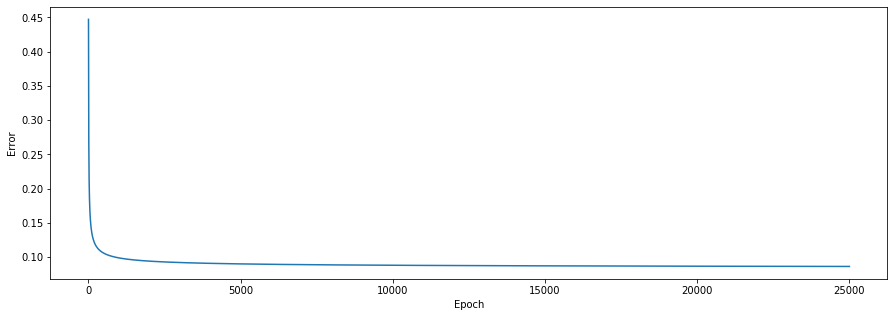

In [5]:
# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Source: [Simple Neural Networks in Python](https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24)

### What is a Neural Network?

A neural network is loosely based on how the human brain works: many neurons connected to other neurons, passing information through their connections and firing when the input to a neuron surpasses a certain threshold. Our artificial neural network will consist of artificial neurons and synapses with information being passed between them. The synapses, or connections, will be weighted according to the neuron’s strength of influence on determining the output. These synaptic weights will go through an optimization process called backpropagation. For each iteration during the training process, backpropagation will be used to go back through the layers of the network and adjusts the weights according to their contribution to the neural net’s error.

Neural networks are essentially self-optimizing functions that map inputs to the correct outputs. We can then place a new input into the function, where it will predict an output based on the function it created with the training data.

![](https://miro.medium.com/max/960/1*ekOVM7MUcWBLx-egd60Yug.png)

### Neural Net’s Goal

This neural network, like all neural networks, will have to learn what the important features are in the data to produce the output. In particular, this neural net will be given an input matrix with six samples, each with three feature columns consisting of solely zeros and ones. For example, one sample in the training set may be [0, 1, 1]. The output to each sample will be a single one or zero. The output will be determined by the number in the first feature column of the data samples. Using the example given before, the output for [0, 1, 1] would be 0, because the first column contains a zero. An example chart will be given below to demonstrate the output for each input sample.

![](https://miro.medium.com/max/891/1*8FHAzqRyn3kAkwzn2u40nw.png)

### Code Breakdown 

```python
import numpy as np
import matplotlib.pyplot as plt
```


Before getting started, we will need to import the necessary libraries. Only two libraries will be needed for this example, without plotting the loss we would only need Numpy. Numpy is a python math library mainly used for linear algebra applications. Matplotlib is a visualization tool that we will use to create a plot to display how our error decreases over time.

```python
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

outputs = np.array([[0], [0], [0], [1], [1], [1]])
```

As mentioned earlier, neural networks need data to learn from. We will create our input data matrix and the corresponding outputs matrix with Numpy’s .array() function. Each sample in the input consists of three feature columns made up of 0s and 1s that produce one output of either a 0 or 1. We want to neural network to learn that the outputs are determined by the first feature column in each sample.

```python
class NeuralNetwork:

    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []


We will take an object-oriented approach to build this particular neural network. We can begin by creating a class called “NeuralNetwork” and initializing the class by defining the `__init__` function. Our `__init__`function will take the inputs and outputs as arguments. We will also need to define our weights, which, for simplicity, will start with each weight being `.50`. Because each feature in the data must be connected to the hidden layer, we will need a weight for each feature in the data (three weights). For plotting purposes, we will also create two empty lists: `loss_history` and `epoch_list`. This will keep track of our neural network’s error at each epoch during the training process.


```python
def sigmoid(self, x, deriv=False):
    if deriv == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))
```

This neural network will be using the sigmoid function, or logistic function, as the activation function. The sigmoid function is a popular nonlinear activation function that has a range of (0–1). The inputs to this function will always be squished down to fit in-between the sigmoid function’s two horizontal asymptotes at y=0 and y=1. The sigmoid function has some well-known issues that restrict its usage. When we look at the graph below of the sigmoidal curve, we notice that as we reach the two ends of the curve, the derivatives of those points become very small. When these small derivatives are multiplied during backpropagation, they become smaller and smaller until becoming useless. Due to the derivatives, or gradients, getting smaller and smaller, the weights in the neural network will not be updated very much, if at all. This will lead the neural network to become stuck, with the situation becoming worse and worse for every additional training iteration.

![](https://miro.medium.com/max/595/1*egqZAB-lOq9ySLEUu3XkBg.jpeg)

The sigmoid function can be written as:

![](https://miro.medium.com/max/216/1*obmnBD8VKXBqt_pmJSFoBQ.png)

And the derivative of the sigmoid function can be written as:

`S′(x)=S(x)⋅(1−S(x))`

### How to get Derivative

A derivative is just a fancy word for the slope or the tangent line to a given point. Take a closer look at the sigmoid function’s curve on the graph above. Where x=0, the slope is much greater than the slope where x=4 or x=-4. The amount that the weight(s) are updated is based on the derivative. If the slope is a lower value, the neural network is confident in its prediction, and less movement of the weights is needed. If the slope is of a higher value, then the neural network's predictions are closer to .50, or 50% (The highest slope value possible for the sigmoid function is at x=0 and y=.5. y is the prediction.). This means the neural network is not very confident in its prediction and is in need of a greater update to the weights.

We can find the derivative of the sigmoid function with the steps below:

![](https://miro.medium.com/max/525/1*z7YlQW6Q6RGN78vhxZJCYQ.png)

We can then use a cool trick to continue the simplification: add one and subtract one to e^-x. Adding one and subtracting one will not change anything because they cancel each other out. It is a fancy way of adding zero.

![](https://miro.medium.com/max/199/1*fQzu3nFtE3LGbE5H2WgWbQ.png)

By adding and subtracting one in the numerator, we can split the fraction up again and pull out another sigmoid function!

![](https://miro.medium.com/max/370/1*6_XjfStMY3KyLhKH-8KvdQ.png)

Now we can simplify and end up with the sigmoid functions simplified derivative.

![](https://miro.medium.com/max/375/1*SNptsgb2S3egVhyJMGTF7Q.png)

If we write the sigmoid function as S(x), then the derivative can be written as:

`=S(x)⋅(1−S(x))`


```python
def feed_forward(self):
    self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))
```

During our neural network’s training process, the input data will be fed forward through the network’s weights and functions. The result of this feed-forward function will be the output of the hidden layer or the hidden layer’s best guess with the weights it is given. Each feature in the input data will have its own weight for its connection to the hidden layer. We will start by taking the sum of every feature multiplied by its corresponding weight. Once we have multiplied the input and weight matrices, we can take the results and feed it through the sigmoid function to get squished down into a probability between (0–1). The forward propagation function can be written like this, where xᵢ and wᵢ are individual features and weights in the matrices:

![](https://miro.medium.com/max/250/1*9E4amGjWeO7PJBiPC5mVzA.png)

To reiterate, the hidden layer will be calculated with the following steps:
Multiply each feature column with its weight
Sum the products of the features and weights
Pass the sum into the sigmoid function to produce the output $\hat y$

![](https://miro.medium.com/max/960/1*2TLvyzyD_VdhOSfVXMgwWw.png)

The above image shows the process of multiplying each feature and its corresponding weight, then taking the sum of the products. Each row in the training data will be computed this way. The resulting 4x1 matrix will be fed into the sigmoid activation function, as shown below:

![](https://miro.medium.com/max/960/1*XifHDEym3yVEsSt9ePxgXA.png)

The above process will result in the hidden layer’s prediction. Each row in the ∑xw matrix will be entered into the sigmoid function. The colours represent the individual processes for each row in the ∑xw matrix. Note: this calculation only represents one training iteration, so the resulting ŷ matrix will not be very accurate. By computing the hidden layer this way, then using backpropagation for many iterations, the result will be much more accurate.

```python
def backpropagation(self):
    self.error  = self.outputs - self.hidden
    delta = self.error * self.sigmoid(self.hidden, deriv=True)
    self.weights += np.dot(self.inputs.T, delta)
````

This is the coolest part of the whole neural net: backpropagation. Backpropagation will go back through the layer(s) of the neural network, determine which weights contributed to the output and the error, then change the weights based on the gradient of the hidden layers output. This will be explained further, but for now, the whole process can be written like this, where y is the correct output and ŷ is the hidden layers prediction:

![](https://miro.medium.com/max/757/1*uOyCCgiVriFtODqr2GyduQ.png)

To calculate the error of the hidden layer’s predictions, we will simply take the difference between the correct output matrix, y, and the hidden layer’s matrix, ŷ. This process will be shown below.

![](https://miro.medium.com/max/960/1*DWrIKv4FyIaE1KKTT0C5iw.png)

We can now multiply the error and the derivative of the hidden layer’s prediction. We know that the derivative of the sigmoid function is S(x)(1 — S(x)). Therefore, the derivative for each of the hidden layer’s predictions would be [(ŷ)(1 — ŷ)]. For example, the first row in the hidden layer’s prediction matrix holds a value of $0.62$. We can substitute ŷ with $0.62$ and the result will be the derivative of the prediction. 0.62 * (1–0.62) = 0.2356. Repeating this process for every row in the ŷ matrix will give you a 4x1 matrix of derivatives which you will then multiply with the error matrix.

![](https://miro.medium.com/max/960/1*pnBUEXlJ-P2Rnp9PIEqTOA.png)

Multiplying the error and the derivative is used to find the change that is needed. When the sigmoid function outputs a value with higher confidence (either close to 0 or close to 1), the derivative will be smaller, therefore the change needed will be smaller. If the sigmoid function outputs a value closer to .50, then the derivative is a larger value, which means there needs to be a larger change in order for the neural net to become more confident.

![](https://miro.medium.com/max/960/1*H1OlGr4EA_BPuGB-6vk97Q.png)

This step will result with the update that will be added to the weights. We can get this update by multiplying our “error weighted derivative” from the above step and the inputs. If the feature in the input is a 0, then the update to the weight will be 0 and if the feature in the input is 1, the update will be added in. This will result in a (3x1) matrix that matches the shape of our weights matrix.

![](https://miro.medium.com/max/960/1*CURMBBdh2lqGO6t8zJ2_qQ.png)

Once we have the updated matrix, we can add it to our weights matrix to officially change the weights to become stronger. Even after one training iteration, there is some noticeable progress! If you look at the updated weights matrix, you may notice that the first weight in the matrix has a higher value. Remember that our neural network must learn that the first feature in the inputs determines the output. We can see that our neural network is already assigning a higher value to the weight connected to the first feature in each input example!

![](https://miro.medium.com/max/960/1*n3b-epov80Ijv-34sgG2Bg.png)

```python
def train(self, epochs=25000):
    for epoch in range(epochs):
        self.feed_forward()
        self.backpropagation()

        self.error_history.append(np.average(np.abs(self.error)))
        self.epoch_list.append(epoch)
```

The time has come to train the neural network. During the training process, the neural net will “learn” which features in the input data correlate with its output, and it will learn to make accurate predictions. To train our neural network, we will create the train function with the number of epochs, or iterations to 25,000. This means the neural network will repeat the weight-updating process 25,000 times. Within the train function, we will call our feed_forward() function, then the backpropagation() function. For each iteration, we will also keep track of the error produced after the feed_forward() function has completed. We will keep track of this by appending the error and epoch to the lists that were initialized earlier. I am sure there is an easier way to do this, but for quick prototyping, this way works just fine for now.
The training process follows the equation below for every weight in our neural net:

xᵢ — Feature in Input Data
wᵢ — The Weight that is Being Updated
Xᵀ — Transposed Input Data
y — Correct Output
ŷ — Predicted Output
(y — ŷ) — Error
∑xᵢwᵢ — Sum of the Products of Input Features and Weights
S(∑xᵢwᵢ) — Sigmoid Function

![](https://miro.medium.com/max/671/1*lvpCnN7fBjNe4N9LCkhimQ.png)

Now that the neural network has been trained and has learned the important features in the input data, we can begin to make predictions. The prediction function will look similar to the hidden layer, or the feedforward() function. The forward propagation function essentially makes a prediction as well, then backpropagation checks for the error and updates the weights. Our predict function will use the same method as the feedforward function: multiply the input matrix and the weights matrix, then feed the results through the sigmoid function to return a value between 0-1. Hopefully, our neural network will make a prediction as close as possible to the actual output.

```python
NN = NeuralNetwork(inputs, outputs)
```

We will create our NN object from the NeuralNetwork class and pass in the input matrix and the output matrix.

```python
NN.train()
```